# Network Properties analysis - **Igraph**

---------------------------------------------

Installing libraries



In [ ]:
!pip install python-igraph
!pip install cairocffi

     |████████████████████████████████| 3.2MB 10.3MB/s 
     |████████████████████████████████| 71kB 4.0MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.2.0-cp36-none-any.whl size=89552 sha256=1052d19daab6d1acaffca3c0a2cd7474ff79882fe4f73a29e8d6140fada46273
  Stored in directory: /root/.cache/pip/wheels/40/76/48/f1effadceea83b32e7d957dd0f92db4db8b537d7b72b4ef374
Successfully built cairocffi


In [ ]:
import pandas as pd
import itertools
import networkx as nx
import igraph as ig
import ast
import cairocffi as cairo
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy.optimize import curve_fit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Creating a **graph** from a pandas dataframe

In [ ]:
def get_graph(adj_matfile, neuron_namesfile):
    # import the adjacency matrix from text file
    adjacency = np.loadtxt(adj_matfile,dtype='int')
    print("Shape of adjacency matrix:", adjacency.shape)

    # import names of each neuron
    f = open(neuron_namesfile,"r") #opens file with name of "test.txt"
    neuron_names = []
    for line in f:
        neuron_names.append(line[:-1]) #[:-1] because we don't want /n in the end.  
    #print((neuron_names2))
    n_neurons = len(neuron_names)
    print("Total number of neurons:",n_neurons)
    
    # create node and node attributes which is the name for the graph
    nodes_list = []
    for i in range(len(neuron_names)):
        #node attribute is given by its neuron name
        nodes_list.append((i,{"name":neuron_names[i]}))
    #print(len(nodes_list))

    # creating an edge list from adjacency matrix
    edge_list=[]
    for i in range(len(neuron_names)):
        for j in range(len(neuron_names)):
            if adjacency[i,j]==0: # if there's no weight, let's forget the edge.
                pass
            else:
                edge_list.append( (i,j,{"weight":adjacency[i,j],"Label":"%s - %s"%(neuron_names[i],neuron_names[j])}) )
    # Creating a directed graph from adjacency matrix so that it will be easy to deal using the networkx module

    G = nx.DiGraph()

    # Add all the nodes to the graph
    G.add_nodes_from(nodes_list)
    # Add all the edges to the graph
    G.add_edges_from(edge_list)

    return adjacency, neuron_names, n_neurons, G

In [ ]:
adj, neuron_names, number_neurons, G = get_graph("/content/drive/MyDrive/Network Science/Delfina/adjacency.txt", "/content/drive/MyDrive/Network Science/Delfina/neuron_names.txt")


Shape of adjacency matrix: (3163, 3163)
Total number of neurons: 3163


In [ ]:
G.is_directed()

True

From *networkx* to *igraph*

In [ ]:
%%time 
#usually takes up to 1 hour with CPU 
g = ig.Graph.from_networkx(G)

for vertice in g.vs[0:10]:
    print(vertice.attributes())
for edge in g.es[0:10]:
    print(edge.attributes())

*Plotting* network

In [ ]:
from matplotlib import cm

grays = cm.get_cmap('gray')
grays(0.2)
import seaborn as sns
seq_col_brew = sns.color_palette("icefire", max(g.es['weight'])+1)


g.es["color"] = [seq_col_brew[v] for v in g.es['weight']]
seq_col_brew

[(0.73936227, 0.90443867, 0.85757238),
 (0.73936227, 0.90443867, 0.85757238),
 (0.72888063, 0.89639109, 0.85488394),
 (0.72888063, 0.89639109, 0.85488394),
 (0.72888063, 0.89639109, 0.85488394),
 (0.71834255, 0.88842162, 0.8521605),
 (0.71834255, 0.88842162, 0.8521605),
 (0.71834255, 0.88842162, 0.8521605),
 (0.70773866, 0.88052939, 0.849422),
 (0.70773866, 0.88052939, 0.849422),
 (0.69706215, 0.87271313, 0.84668315),
 (0.69706215, 0.87271313, 0.84668315),
 (0.69706215, 0.87271313, 0.84668315),
 (0.68629021, 0.86497329, 0.84398721),
 (0.68629021, 0.86497329, 0.84398721),
 (0.68629021, 0.86497329, 0.84398721),
 (0.67543654, 0.85730617, 0.84130969),
 (0.67543654, 0.85730617, 0.84130969),
 (0.66448539, 0.84971123, 0.83868005),
 (0.66448539, 0.84971123, 0.83868005),
 (0.66448539, 0.84971123, 0.83868005),
 (0.65342679, 0.84218728, 0.83611512),
 (0.65342679, 0.84218728, 0.83611512),
 (0.65342679, 0.84218728, 0.83611512),
 (0.64231804, 0.83471867, 0.83358584),
 (0.64231804, 0.83471867, 0.83358584),
 (0.63117745, 0.827294, 0.83113431),
 (0.63117745, 0.827294, 0.83113431),
 (0.63117745, 0.827294, 0.83113431),
 (0.62000484, 0.81991069, 0.82876741),
 (0.62000484, 0.81991069, 0.82876741),
 (0.62000484, 0.81991069, 0.82876741),
 (0.60879435, 0.81256797, 0.82648905),
 (0.60879435, 0.81256797, 0.82648905),
 (0.59754118, 0.80526458, 0.82430414),
 (0.59754118, 0.80526458, 0.82430414),
 (0.59754118, 0.80526458, 0.82430414),
 (0.58624247, 0.79799884, 0.82221573),
 (0.58624247, 0.79799884, 0.82221573),
 (0.58624247, 0.79799884, 0.82221573),
 (0.57489525, 0.7907688, 0.82022901),
 (0.57489525, 0.7907688, 0.82022901),
 (0.57489525, 0.7907688, 0.82022901),
 (0.56349779, 0.78357215, 0.81834861),
 (0.56349779, 0.78357215, 0.81834861),
 (0.55204294, 0.77640827, 0.81657563),
 (0.55204294, 0.77640827, 0.81657563),
 (0.55204294, 0.77640827, 0.81657563),
 (0.54052516, 0.76927562, 0.81491462),
 (0.54052516, 0.76927562, 0.81491462),
 (0.54052516, 0.76927562, 0.81491462),
 (0.52894085, 0.76217215, 0.81336913),
 (0.52894085, 0.76217215, 0.81336913),
 (0.51728854, 0.75509528, 0.81194156),
 (0.51728854, 0.75509528, 0.81194156),
 (0.51728854, 0.75509528, 0.81194156),
 (0.50555676, 0.74804469, 0.81063503),
 (0.50555676, 0.74804469, 0.81063503),
 (0.50555676, 0.74804469, 0.81063503),
 (0.49373871, 0.7410187, 0.80945242),
 (0.49373871, 0.7410187, 0.80945242),
 (0.48183174, 0.73401449, 0.80839675),
 (0.48183174, 0.73401449, 0.80839675),
 (0.48183174, 0.73401449, 0.80839675),
 (0.46982587, 0.72703075, 0.80747097),
 (0.46982587, 0.72703075, 0.80747097),
 (0.46982587, 0.72703075, 0.80747097),
 (0.45770893, 0.72006648, 0.80667756),
 (0.45770893, 0.72006648, 0.80667756),
 (0.44547249, 0.71311941, 0.80601991),
 (0.44547249, 0.71311941, 0.80601991),
 (0.44547249, 0.71311941, 0.80601991),
 (0.43318643, 0.70617126, 0.80549278),
 (0.43318643, 0.70617126, 0.80549278),
 (0.43318643, 0.70617126, 0.80549278),
 (0.42110294, 0.69916972, 0.80506683),
 (0.42110294, 0.69916972, 0.80506683),
 (0.42110294, 0.69916972, 0.80506683),
 (0.40925101, 0.69211059, 0.80473246),
 (0.40925101, 0.69211059, 0.80473246),
 (0.3976693, 0.68498786, 0.80448272),
 (0.3976693, 0.68498786, 0.80448272),
 (0.3976693, 0.68498786, 0.80448272),
 (0.38632002, 0.67781125, 0.80431024),
 (0.38632002, 0.67781125, 0.80431024),
 (0.38632002, 0.67781125, 0.80431024),
 (0.37523981, 0.67057537, 0.80420832),
 (0.37523981, 0.67057537, 0.80420832),
 (0.36442578, 0.66328229, 0.80417474),
 (0.36442578, 0.66328229, 0.80417474),
 (0.36442578, 0.66328229, 0.80417474),
 (0.35385939, 0.65593699, 0.80420591),
 (0.35385939, 0.65593699, 0.80420591),
 (0.35385939, 0.65593699, 0.80420591),
 (0.34358916, 0.64853177, 0.8043),
 (0.34358916, 0.64853177, 0.8043),
 (0.33355526, 0.64107876, 0.80445484),
 (0.33355526, 0.64107876, 0.80445484),
 (0.33355526, 0.64107876, 0.80445484),
 (0.32383062, 0.63356578, 0.80467091),
 (0.32383062, 0.63356578, 0.80467091),
 (0.32383062, 0.63356578, 0.80467091),
 (0.31434372, 0.62600624, 0.8049475),
 (0.31434372,

In [ ]:
np.mean(g.es['weight'])

23.747343883342783

In [ ]:
visual_style = {}

# Set bbox and margin
visual_style["bbox"] = (15000,15000)
visual_style["margin"] = 1

# Set vertex colours
visual_style["vertex_color"] = 'lightseagreen'
visual_style["edge_color"] = "lightgray" #g.es["color"]
visual_style["vertex_label"] = g.vs['_nx_name']

# Set vertex size
visual_style["vertex_size"] = 120
#g.es["color"] = False

visual_style["edge_width"] = .3
visual_style["edge_length"] = [100/x for x in g.es["weight"]]

# Set vertex lable size
visual_style["vertex_label_size"] = 70

# Don't curve the edges
visual_style["edge_curved"] = 0.3

# Set the layout
#my_layout = g.layout(layout='kk') #kamada-kawai layout
#my_layout = g.layout(layout='tree')  #tree
#my_layout = g.layout(layout='circle') #circle
#my_layout = g.layout(layout='auto') #automatic
my_layout = g.layout(layout='drl') #Frucherman-Reingold layout

visual_style["layout"] = my_layout

#background
visual_style["background"] = "white"

#colors = ig.drawing.colors.known_colors
#visual_style["vertex_label_color"] = [random.choice(list(colors.keys())) for v in g.vs()]

# Plot the graph
#ig.plot(g, "Figure_general.png",**visual_style, vertex_frame_color = 'seagreen' , directed = True, loops = False )

# **Network Properties**

### Main Graph properties:

1.  Graph Order
2.  Graph Size
3.  Graph density



In [ ]:
# GRAPH ORDER = NO OF NODES
nodes = g.vs()
edges = g.es()

print("Graph order:", len(nodes))
print("Number of vertices:", g.vcount())

# GRAPH SIZE = NO OF EDGES
print("Graph size:", len(edges))
print("Number of edges:", g.ecount())


# DENSITY - HOW CONNECTED ARE THE NODES? NO OF EDGES/NO OF POSSIBLE EDGES
print("Graph density:", g.density())

#works for undirected
#print("Graph density - manual: ", len(edges)/(len(nodes)*(len(nodes)-1)*0.5)) #actual connections / potential conections -- manually done
#print("Density of the graph:", 2*g.ecount()/(g.vcount()*(g.vcount()-1)))

print("Potential conections:", len(nodes)*(len(nodes)-1)*0.5)

Graph order: 3163
Number of vertices: 3163
Graph size: 349194
Number of edges: 349194
Graph density: 0.03491449102256223
Graph density - manual:  0.06982898204512446
Density of the graph: 0.06982898204512446
Potential conections: 5000703.0


In [ ]:
# CONNECTEDNESS
print("Is the graph connected:","yes" if g.is_connected() else "no")

Is the graph connected: no


The graph is not fully connected in fact the density is quite low and there are isolated components (there are four of them)

### Connectivity: Node Degree

In [ ]:
from matplotlib import cm

viridis = cm.get_cmap('viridis', 12)
viridis(0.2)

(0.262138, 0.242286, 0.520837, 1.0)

In [ ]:
max_degree = max(g.vs.degree())
g.vs[1]['color'] = 'blue'

In [ ]:
# CONNECTIVITY - HOW WELL CONNECTED A NODE IS
print("Node degrees:"),
for node in g.vs():
    print("  ",node["_nx_name"],"degree:",node.degree())
    value = int(node.degree()/max_degree)

g.vs["color"] = [viridis(value/max_degree) for value in g.degree()]

  
#SET SIZE PROP TO DEGREE
visual_style["vertex_size"] = [degree/1.5 if degree>3 else 20 for degree in g.degree()]
visual_style["bbox"] = (15000,15000)
visual_style["vertex_label_size"] = [70 if degree>3 else 30 for degree in g.degree()]

Node degrees:
   0 degree: 303
   1 degree: 251
   2 degree: 187
   3 degree: 168
   4 degree: 320
   5 degree: 318
   6 degree: 237
   7 degree: 63
   8 degree: 265
   9 degree: 372
   10 degree: 49
   11 degree: 160
   12 degree: 38
   13 degree: 285
   14 degree: 298
   15 degree: 69
   16 degree: 377
   17 degree: 80
   18 degree: 119
   19 degree: 434
   20 degree: 45
   21 degree: 274
   22 degree: 334
   23 degree: 336
   24 degree: 316
   25 degree: 120
   26 degree: 199
   27 degree: 34
   28 degree: 197
   29 degree: 529
   30 degree: 288
   31 degree: 72
   32 degree: 96
   33 degree: 525
   34 degree: 125
   35 degree: 167
   36 degree: 109
   37 degree: 270
   38 degree: 92
   39 degree: 67
   40 degree: 50
   41 degree: 31
   42 degree: 107
   43 degree: 376
   44 degree: 349
   45 degree: 156
   46 degree: 224
   47 degree: 337
   48 degree: 106
   49 degree: 64
   50 degree: 246
   51 degree: 28
   52 degree: 434
   53 degree: 271
   54 degree: 242
   55 degree: 299
   

In [ ]:
degrees = []
total = 0

for n in range(len(nodes)):
    neighbours = g.neighbors(n, mode='ALL')
    total += len(neighbours)
    degrees.append(len(neighbours))
    
print("Average degree:", total/len(nodes))
print("Maximum degree:", max(degrees))
#node with maximum degree
for node in g.vs():
  if max(g.degree()) == node.degree():
    print("Node with maximum degree ",node["_nx_name"],"degree:",node.degree())

visual_style['vertex_color'] =  g.vs['color']

Average degree: 220.79924122668353
Maximum degree: 796
Node with maximum degree  329 degree: 796


In [ ]:
ig.plot(g, "Figure_node_degree.png",  **visual_style)

## Centrality measurements

#### Betwenness

In [ ]:
betwennes = pd.read_csv("/content/drive/MyDrive/Delfina/betweenness.csv")
visual_style["bbox"] = (10000,10000)


In [ ]:
betwennes = betwennes.sort_values(['Node'])
betwennes = betwennes.reset_index()
max_betw =max(betwennes['Betweenness centrality'])

In [ ]:
g.vs["color"] = [viridis(value/max_betw) for value in betwennes['Betweenness centrality']]
  
visual_style["vertex_size"] = [degree*60000 for degree in betwennes['Betweenness centrality']]
visual_style["vertex_label_size"] = [70 for degree in betwennes['Betweenness centrality']]
visual_style['vertex_color'] =  g.vs['color']


In [ ]:
ig.plot(g, "betwennes.png", **visual_style)

#### Closeness

In [ ]:
closeness = pd.read_csv("/content/drive/MyDrive/Delfina/closeness.csv")

closeness = closeness.sort_values(['Node'])
closeness = closeness.reset_index()
max_betw =max(closeness['Closeness centrality'])

g.vs["color"] = [viridis(value/max_betw) for value in closeness['Closeness centrality']]
  
visual_style["vertex_size"] = [degree*1000 for degree in closeness['Closeness centrality']]
visual_style["vertex_label_size"] = [70 for degree in closeness['Closeness centrality']]
visual_style['vertex_color'] =  g.vs['color']

ig.plot(g, "closeness.png", **visual_style)

#### In degree

In [ ]:
in_degree = pd.read_csv("/content/drive/MyDrive/Delfina/in_degree.csv")

in_degree = in_degree.sort_values(['Node'])
in_degree = in_degree.reset_index()
max_betw =max(in_degree['In Degree centrality'])

g.vs["color"] = [viridis(value/max_betw) for value in in_degree['In Degree centrality']]
  
visual_style["vertex_size"] = [degree for degree in in_degree['In Degree centrality']]
visual_style["vertex_label_size"] = [70 for degree in in_degree['In Degree centrality']]
visual_style['vertex_color'] =  g.vs['color']
ig.plot(g, "in_degree.png", **visual_style)

#### Out degree

In [ ]:
out_degree = pd.read_csv("/content/drive/MyDrive/Delfina/out_degree.csv")

out_degree = out_degree.sort_values(['Node'])
out_degree = out_degree.reset_index()
max_betw =max(out_degree['Out Degree centrality'])

g.vs["color"] = [viridis(value/max_betw) for value in out_degree['Out Degree centrality']]
  
visual_style["vertex_size"] = [degree for degree in out_degree['Out Degree centrality']]
visual_style["vertex_label_size"] = [70 for degree in out_degree['Out Degree centrality']]
visual_style['vertex_color'] =  g.vs['color']
ig.plot(g, "out_degree.png", **visual_style)

#### Eigenvector

In [ ]:
eigenvec = pd.read_csv("/content/drive/MyDrive/Delfina/eigenvec.csv")

eigenvec = eigenvec.sort_values(['Node'])
eigenvec = eigenvec.reset_index()
max_betw =max(eigenvec['Eigenvector centrality'])

g.vs["color"] = [viridis(value/max_betw) for value in eigenvec['Eigenvector centrality']]
  
visual_style["vertex_size"] = [degree*6000 for degree in eigenvec['Eigenvector centrality']]
visual_style["vertex_label_size"] = [70 for degree in eigenvec['Eigenvector centrality']]
visual_style['vertex_color'] =  g.vs['color']
ig.plot(g, "eigenvec.png", **visual_style)

#### Page rank

In [ ]:
page_rank = pd.read_csv("/content/drive/MyDrive/Delfina/page_rank.csv")

page_rank = page_rank.sort_values(['Node'])
page_rank = page_rank.reset_index()
max_betw =max(page_rank['Page Rank centrality'])

g.vs["color"] = [viridis(value/max_betw) for value in page_rank['Page Rank centrality']]
  
visual_style["vertex_size"] = [degree*100000 for degree in page_rank['Page Rank centrality']]
visual_style["vertex_label_size"] = [70 for degree in page_rank['Page Rank centrality']]
visual_style['vertex_color'] =  g.vs['color']
ig.plot(g, "page_rank.png", **visual_style)

### Diameter

There are many network metrics derived from shortest path lengths. One such measure is diameter, which is the longest of all shortest paths

In [ ]:
print("Network diameter:", g.diameter(directed=True, weights = 'weight'))

Network diameter: 10


In [ ]:
# GET NODES IN THE DIAMETER PATH 
diameter_path = g.get_diameter()
# GET EDGES IN THE DIAMETER PATH
diameter_edges = g.get_eids(path=diameter_path, directed=True)

print("Path between most distant nodes:", [index for index in diameter_path])

# AVERAGE PATH LENGTH - HOW CLOSE ARE THE NODES TO EACH OTHER ON AVERAGE
print("Average path length:", g.average_path_length(directed=True))

Path between most distant nodes: [152, 702, 1897, 72, 3074, 1216, 2853, 1172, 1302, 743, 1892]
Average path length: 2.6889183256468456


In [ ]:
[g.vs[idx]['name'] for idx in diameter_path]

['T_190220_1026xBG_7_2',
 'T_190220_1026xBG_11_2',
 'T_181102_3_1',
 'T_190909_11_1_M',
 'T_191016_3_1',
 'T_190125_12_6',
 'T_170221_2_2',
 'T_160610_HuCxBG_15_3_complemented',
 'T_170221_17_1',
 'T_190723_10_4',
 'T_160708_HuCxBG_23_3']

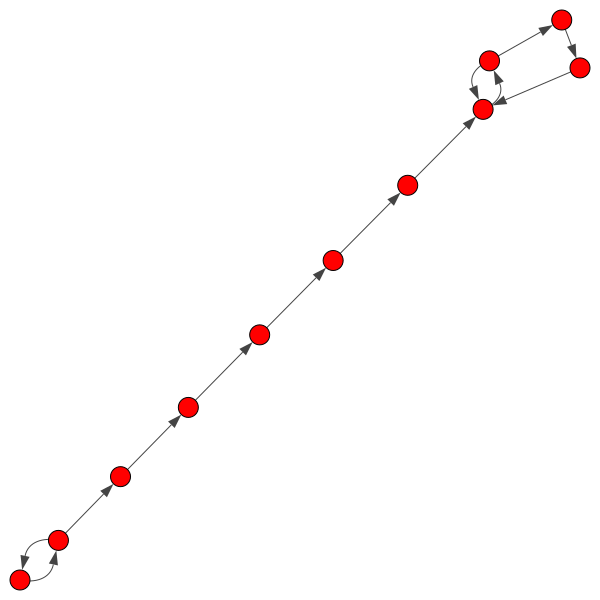

In [ ]:
H = g.subgraph(diameter_path)
ig.plot(H, "diameter.png")

## Transitivity of a graph


Transitivity measures the probability that the adjacent vertices of a vertex are connected. This is sometimes also called the clustering coefficient.

The transitivity coefficient $T$ of a network, also known as clustering coefficient, is the ratio of the number of loops of length three and the number of paths of length two. Hence, it is the frequency of loops of length three in the network.

$T = 1$ implies perfect transitivity, i.e., a network whose components are all cliques. $T=0$ implied no closed path of length two, which happens for various topologies, such as a tree or a square lattice. 

In [ ]:
# GLOBAL OR LOCAL CLUSTERING COEFFICIENT - GENERAL INDICATION OF THE GRAPH'S TENDENCY TO BE ORGANISED INTO CLUSTERS
# GLOBAL CC - NUMBER OF CLOSED TRIPLETS/NUMBER OF POSSIBLE TRIPLETS
print("Global clustering coefficient", g.transitivity_undirected())

Global clustering coefficient 0.35482565534918253


In [ ]:
# LOCAL CC - ARE THE NEIGHBOURS OF THE NODES ALSO CONNECTED?
print("Local clustering components:")
local_ccs = g.transitivity_local_undirected()
sum_cc = 0
for local_cc in local_ccs:
    if not math.isnan(local_cc):
        sum_cc += local_cc

for node in nodes:
        print("   Local clustering coefficient of node", node["_nx_name"],":",local_ccs[node.index])

Local clustering components:
   Local clustering coefficient of node 0 : 0.2907834101382489
   Local clustering coefficient of node 1 : 0.4398480371464753
   Local clustering coefficient of node 2 : 0.28853198083967313
   Local clustering coefficient of node 3 : 0.5596007046388726
   Local clustering coefficient of node 4 : 0.3673658622158735
   Local clustering coefficient of node 5 : 0.34806871901302894
   Local clustering coefficient of node 6 : 0.4305470044991712
   Local clustering coefficient of node 7 : 0.6457912457912458
   Local clustering coefficient of node 8 : 0.4237907020515716
   Local clustering coefficient of node 9 : 0.3748545967153645
   Local clustering coefficient of node 10 : 0.4897435897435898
   Local clustering coefficient of node 11 : 0.42634245187436676
   Local clustering coefficient of node 12 : 0.8714285714285714
   Local clustering coefficient of node 13 : 0.40945626477541375
   Local clustering coefficient of node 14 : 0.2442641716020505
   Local clusteri

In [ ]:
max(local_ccs)  

1.0

In [ ]:
# AVERAGE CC
print("Average clustering component", sum_cc/len(g.vs()))

Average clustering component 0.4343309732972573


## Cliques

In [ ]:
# Source: https://stackoverflow.com/questions/34219481/python-igraph-finding-number-of-triangles-for-each-vertex
cliques = g.cliques(min=3, max=3)
triangle_count = [0] * g.vcount()
for i, j, k in cliques:
    triangle_count[i] += 1
    triangle_count[j] += 1
    triangle_count[k] += 1

print("Average number of triangles:", sum(triangle_count)/g.vcount())
print("Maximum number of triangles:", max(triangle_count))
print("Vertex ID with the maximum number of triangles:", triangle_count.index(max(triangle_count)))

Average number of triangles: 8160.887764780272
Maximum number of triangles: 45571
Vertex ID with the maximum number of triangles: 329


In [ ]:
cliq = pd.read_csv("/content/drive/MyDrive/Delfina/largest_cliques.csv")
cliq.columns =['Node'] 
cliq['Node']

In [ ]:
H = g.subgraph(cliq['Node'])

ig.plot(H, "largest_cliq.png", **visual_style)